In [1]:
import pandas as pd
import glob

In [3]:
import pandas as pd
import glob
import os


print("Current working directory:", os.getcwd())

crop_path = "../data/raw/crop_prices/*.csv"
rainfall_path = "../data/raw/rainfall/*.csv"  


crop_files = glob.glob(crop_path)
print("Crop files found:", crop_files)


df_list = []
for file in crop_files:
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)

if df_list: 
    df = pd.concat(df_list, ignore_index=True)
    print("Merged dataframe shape:", df.shape)
    print("Columns:", df.columns)
else:
    print("No crop price CSV files found!")



Current working directory: c:\Users\sengu\Downloads\Sasyam\Crop_Price_Prediction\notebooks
Crop files found: ['../data/raw/crop_prices\\2010.csv', '../data/raw/crop_prices\\2011.csv', '../data/raw/crop_prices\\2012.csv', '../data/raw/crop_prices\\2013.csv', '../data/raw/crop_prices\\2014.csv', '../data/raw/crop_prices\\2015.csv', '../data/raw/crop_prices\\2016.csv', '../data/raw/crop_prices\\2017.csv', '../data/raw/crop_prices\\2018.csv', '../data/raw/crop_prices\\2019.csv', '../data/raw/crop_prices\\2020.csv', '../data/raw/crop_prices\\2021.csv', '../data/raw/crop_prices\\2022.csv', '../data/raw/crop_prices\\2023.csv', '../data/raw/crop_prices\\2024.csv']
Merged dataframe shape: (57117922, 11)
Columns: Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Arrival_Date', 'Min_Price', 'Max_Price', 'Modal_Price',
       'Commodity_Code'],
      dtype='object')


In [5]:
if 'Arrival_Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Arrival_Date'])
    print("Date column created successfully.")




Date column created successfully.


In [6]:
df_state = df[df['State'] == 'West Bengal']



In [7]:
df_state.shape

(2285045, 12)

In [8]:
df_state.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code,Date
7875,West Bengal,Alipurduar,Alipurduar,Brinjal,Brinjal,FAQ,2010-01-01,750.0,900.0,800.0,35,2010-01-01
7876,West Bengal,Alipurduar,Alipurduar,Cabbage,Cabbage,FAQ,2010-01-01,275.0,325.0,300.0,154,2010-01-01
7877,West Bengal,Alipurduar,Alipurduar,Cauliflower,Cauliflower,FAQ,2010-01-01,650.0,750.0,700.0,34,2010-01-01
7878,West Bengal,Alipurduar,Alipurduar,Green Chilli,Green Chilly,FAQ,2010-01-01,1250.0,1350.0,1300.0,87,2010-01-01
7879,West Bengal,Alipurduar,Alipurduar,Onion,Onion,FAQ,2010-01-01,1750.0,1900.0,1800.0,23,2010-01-01


In [9]:
df_state['Year'] = df_state['Date'].dt.year
df_state['Month'] = df_state['Date'].dt.month


C:\Users\sengu\AppData\Local\Temp\ipykernel_4196\1564120728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['Year'] = df_state['Date'].dt.year
C:\Users\sengu\AppData\Local\Temp\ipykernel_4196\1564120728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state['Month'] = df_state['Date'].dt.month


In [10]:

monthly_df = df_state.groupby(
    ['Commodity','District','Market','Year','Month']
).agg({
    'Modal_Price':'mean'
}).reset_index()



In [11]:
monthly_df.head(50)

,Commodity,District,Market,Year,Month,Modal_Price
0,Almond (Badam),Darjeeling,Karsiyang (Matigara),2015,7,1900.000000
1,Almond (Badam),Kalimpong,Kalimpong,2022,8,7500.000000
2,Almond (Badam),Kalimpong,Kalimpong,2022,9,3500.000000
3,Almond (Badam),Kalimpong,Kalimpong,2023,6,2500.000000
4,Almond (Badam),Kalimpong,Kalimpong,2023,8,5000.000000
5,Apple,Darjeeling,Matigara,2010,12,5137.500000
6,Apple,Darjeeling,Matigara,2011,2,5750.000000
7,Apple,Darjeeling,Matigara,2011,4,6500.000000
8,Apple,Darjeeling,Matigara,2011,5,7200.000000
9,Apple,Darjeeling,Matigara,2011,6,8335.714286


In [12]:
monthly_df.shape

(93970, 6)

In [13]:
print(monthly_df.head())
print(monthly_df.info())
print(monthly_df.describe())


        Commodity    District                Market  Year  Month  Modal_Price
0  Almond (Badam)  Darjeeling  Karsiyang (Matigara)  2015      7       1900.0
1  Almond (Badam)   Kalimpong             Kalimpong  2022      8       7500.0
2  Almond (Badam)   Kalimpong             Kalimpong  2022      9       3500.0
3  Almond (Badam)   Kalimpong             Kalimpong  2023      6       2500.0
4  Almond (Badam)   Kalimpong             Kalimpong  2023      8       5000.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93970 entries, 0 to 93969
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Commodity    93970 non-null  object 
 1   District     93970 non-null  object 
 2   Market       93970 non-null  object 
 3   Year         93970 non-null  int32  
 4   Month        93970 non-null  int32  
 5   Modal_Price  93970 non-null  float64
dtypes: float64(1), int32(2), object(3)
memory usage: 3.6+ MB
None
               Year  

In [14]:
print(monthly_df.isnull().sum())


Commodity      0
District       0
Market         0
Year           0
Month          0
Modal_Price    0
dtype: int64


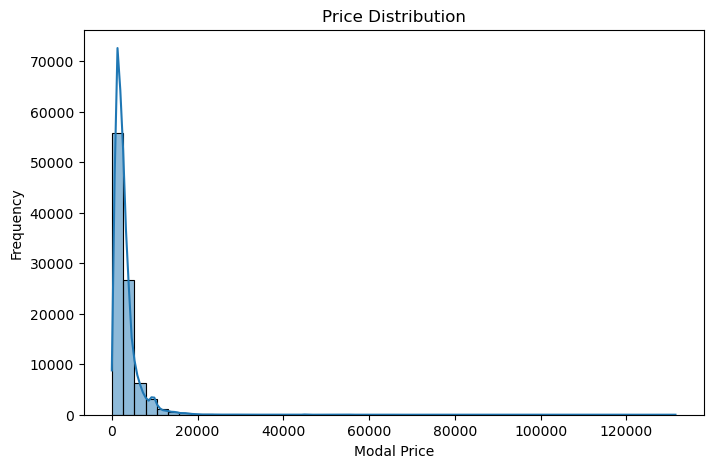

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(monthly_df['Modal_Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Modal Price')
plt.ylabel('Frequency')
plt.show()



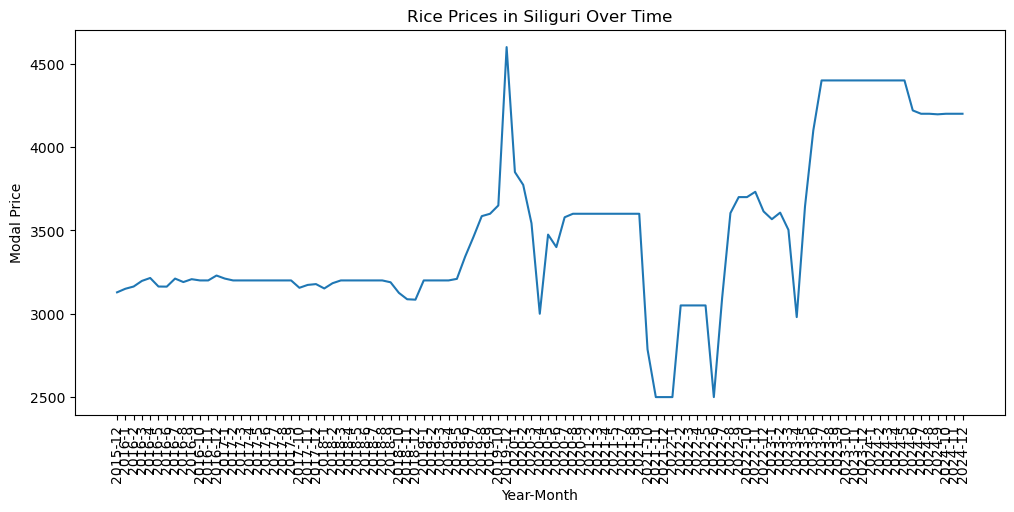

In [16]:
sample = monthly_df[(monthly_df['Commodity'] == 'Rice') & (monthly_df['Market'] == 'Siliguri')]

plt.figure(figsize=(12,5))
plt.plot(sample['Year'].astype(str) + '-' + sample['Month'].astype(str), sample['Modal_Price'])
plt.xticks(rotation=90)
plt.title('Rice Prices in Siliguri Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Modal Price')
plt.show()


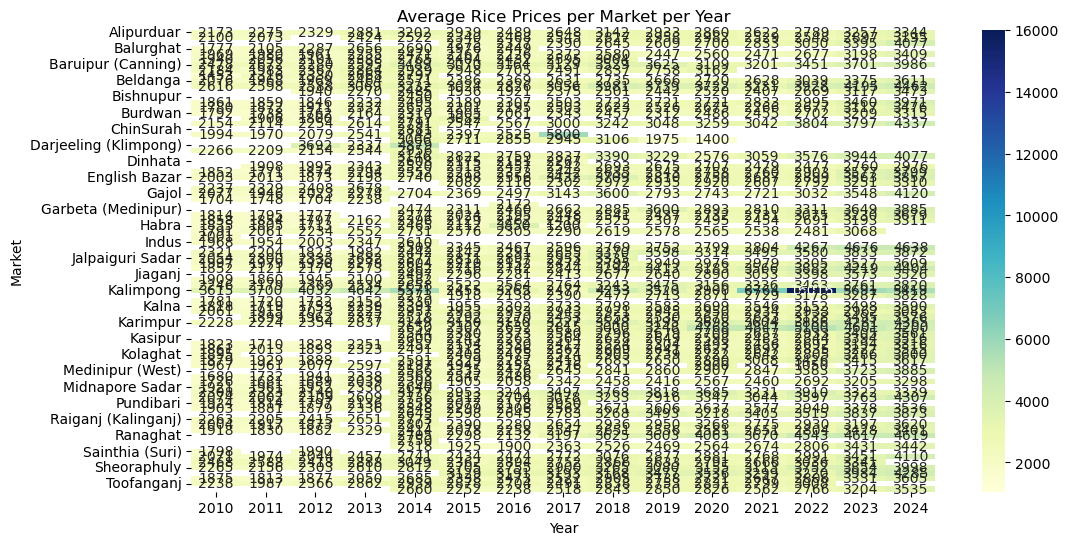

In [17]:
import seaborn as sns

pivot_df = monthly_df[monthly_df['Commodity'] == 'Rice'].pivot_table(
    index='Market', columns='Year', values='Modal_Price', aggfunc='mean'
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Average Rice Prices per Market per Year')
plt.show()





In [18]:
monthly_df['State'] = 'West Bengal'

In [19]:
monthly_df.head(50)

,Commodity,District,Market,Year,Month,Modal_Price,State
0,Almond (Badam),Darjeeling,Karsiyang (Matigara),2015,7,1900.000000,West Bengal
1,Almond (Badam),Kalimpong,Kalimpong,2022,8,7500.000000,West Bengal
2,Almond (Badam),Kalimpong,Kalimpong,2022,9,3500.000000,West Bengal
3,Almond (Badam),Kalimpong,Kalimpong,2023,6,2500.000000,West Bengal
4,Almond (Badam),Kalimpong,Kalimpong,2023,8,5000.000000,West Bengal
5,Apple,Darjeeling,Matigara,2010,12,5137.500000,West Bengal
6,Apple,Darjeeling,Matigara,2011,2,5750.000000,West Bengal
7,Apple,Darjeeling,Matigara,2011,4,6500.000000,West Bengal
8,Apple,Darjeeling,Matigara,2011,5,7200.000000,West Bengal
9,Apple,Darjeeling,Matigara,2011,6,8335.714286,West Bengal


In [20]:
rain_df = pd.read_csv("../data/raw/rainfall/daily_rainfall_india.csv")
rain_df.shape


(204876, 8)

In [21]:
rain_df.head()

,id,date,state_code,state_name,actual,rfs,normal,deviation
0,0,2009-01-01,5,Uttarakhand,0.0,0.003906,2.19,-100.0
1,1,2009-01-01,18,Assam,0.0,0.000000,0.52,-100.0
2,2,2009-01-01,16,Tripura,0.0,0.000000,0.09,-100.0
3,3,2009-01-01,36,Telangana,0.0,0.000000,0.17,-100.0
4,4,2009-01-01,2,Himachal Pradesh,0.0,0.008566,3.31,-100.0


In [22]:
rain_df = rain_df[rain_df['state_name'] == 'West Bengal']


In [23]:
rain_df.head(10)

,id,date,state_code,state_name,actual,rfs,normal,deviation
22,22,2009-01-01,19,West Bengal,0.04,0.103831,0.02,100.00
57,57,2009-01-02,19,West Bengal,0.20,0.573094,0.16,25.00
92,92,2009-01-03,19,West Bengal,0.00,0.000000,0.31,-100.00
127,127,2009-01-04,19,West Bengal,0.00,0.000000,0.87,-100.00
162,162,2009-01-05,19,West Bengal,0.00,0.010608,0.06,-100.00
197,197,2009-01-06,19,West Bengal,0.04,0.128458,0.31,-87.10
232,232,2009-01-07,19,West Bengal,0.02,0.051136,0.52,-96.15
267,267,2009-01-08,19,West Bengal,0.03,0.094055,0.87,-96.55
302,302,2009-01-09,19,West Bengal,0.00,0.001888,0.35,-100.00
337,337,2009-01-10,19,West Bengal,0.00,0.000000,0.73,-100.00


In [24]:
rain_df = rain_df[['date', 'state_name', 'actual']]

In [25]:
rain_df = rain_df.rename(columns={'state_name': 'State', 'actual': 'Rainfall'})

In [26]:
rain_df.head()

,date,State,Rainfall
22,2009-01-01,West Bengal,0.04
57,2009-01-02,West Bengal,0.20
92,2009-01-03,West Bengal,0.00
127,2009-01-04,West Bengal,0.00
162,2009-01-05,West Bengal,0.00


In [27]:
rain_df['Date'] = pd.to_datetime(rain_df['date'])
rain_df['Year'] = rain_df['Date'].dt.year
rain_df['Month'] = rain_df['Date'].dt.month

In [28]:
rain_df = rain_df[rain_df['Year'] >= 2010]

In [29]:
rain_df.head()

,date,State,Rainfall,Date,Year,Month
12797,2010-01-01,West Bengal,0.0,2010-01-01,2010,1
12832,2010-01-02,West Bengal,0.0,2010-01-02,2010,1
12867,2010-01-03,West Bengal,0.0,2010-01-03,2010,1
12902,2010-01-04,West Bengal,0.0,2010-01-04,2010,1
12937,2010-01-05,West Bengal,0.0,2010-01-05,2010,1


In [30]:
monthly_rain = rain_df.groupby(['State', 'Year', 'Month'])['Rainfall'].sum().reset_index()

In [31]:
monthly_rain.head(10)

,State,Year,Month,Rainfall
0,West Bengal,2010,1,0.10
1,West Bengal,2010,2,7.96
2,West Bengal,2010,3,16.99
3,West Bengal,2010,4,66.26
4,West Bengal,2010,5,185.69
5,West Bengal,2010,6,301.12
6,West Bengal,2010,7,324.52
7,West Bengal,2010,8,261.53
8,West Bengal,2010,9,249.44
9,West Bengal,2010,10,87.85


In [32]:
monthly_df = monthly_df.merge(monthly_rain, on=['State', 'Year', 'Month'], how='left')

In [33]:
monthly_df.head(10)

,Commodity,District,Market,Year,Month,Modal_Price,State,Rainfall
0,Almond (Badam),Darjeeling,Karsiyang (Matigara),2015,7,1900.000000,West Bengal,568.24
1,Almond (Badam),Kalimpong,Kalimpong,2022,8,7500.000000,West Bengal,308.00
2,Almond (Badam),Kalimpong,Kalimpong,2022,9,3500.000000,West Bengal,259.44
3,Almond (Badam),Kalimpong,Kalimpong,2023,6,2500.000000,West Bengal,295.08
4,Almond (Badam),Kalimpong,Kalimpong,2023,8,5000.000000,West Bengal,352.23
5,Apple,Darjeeling,Matigara,2010,12,5137.500000,West Bengal,24.03
6,Apple,Darjeeling,Matigara,2011,2,5750.000000,West Bengal,3.11
7,Apple,Darjeeling,Matigara,2011,4,6500.000000,West Bengal,74.35
8,Apple,Darjeeling,Matigara,2011,5,7200.000000,West Bengal,119.60
9,Apple,Darjeeling,Matigara,2011,6,8335.714286,West Bengal,342.25


In [34]:
monthly_df.isnull().sum()

Commodity         0
District          0
Market            0
Year              0
Month             0
Modal_Price       0
State             0
Rainfall       2943
dtype: int64

In [35]:
monthly_df['Rainfall'] = monthly_df.groupby('Month')['Rainfall'].transform(
    lambda x: x.fillna(x.mean())
)


In [36]:
monthly_df.isnull().sum()

Commodity      0
District       0
Market         0
Year           0
Month          0
Modal_Price    0
State          0
Rainfall       0
dtype: int64

In [37]:
monthly_df.shape

(93970, 8)

In [38]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:  # 9, 10, 11
        return 'Post-Monsoon'

monthly_df['Season'] = monthly_df['Month'].apply(get_season)

In [39]:
monthly_df[['Month', 'Season']].drop_duplicates().sort_values('Month')

,Month,Season
11,1,Winter
6,2,Winter
13,3,Summer
7,4,Summer
8,5,Summer
3,6,Monsoon
0,7,Monsoon
1,8,Monsoon
2,9,Post-Monsoon
20,10,Post-Monsoon


In [40]:
monthly_df.head(25)

,Commodity,District,Market,Year,Month,Modal_Price,State,Rainfall,Season
0,Almond (Badam),Darjeeling,Karsiyang (Matigara),2015,7,1900.000000,West Bengal,568.24,Monsoon
1,Almond (Badam),Kalimpong,Kalimpong,2022,8,7500.000000,West Bengal,308.00,Monsoon
2,Almond (Badam),Kalimpong,Kalimpong,2022,9,3500.000000,West Bengal,259.44,Post-Monsoon
3,Almond (Badam),Kalimpong,Kalimpong,2023,6,2500.000000,West Bengal,295.08,Monsoon
4,Almond (Badam),Kalimpong,Kalimpong,2023,8,5000.000000,West Bengal,352.23,Monsoon
5,Apple,Darjeeling,Matigara,2010,12,5137.500000,West Bengal,24.03,Winter
6,Apple,Darjeeling,Matigara,2011,2,5750.000000,West Bengal,3.11,Winter
7,Apple,Darjeeling,Matigara,2011,4,6500.000000,West Bengal,74.35,Summer
8,Apple,Darjeeling,Matigara,2011,5,7200.000000,West Bengal,119.60,Summer
9,Apple,Darjeeling,Matigara,2011,6,8335.714286,West Bengal,342.25,Monsoon


In [41]:
monthly_df = monthly_df.sort_values(
    by=["Commodity", "District", "Market", "Year", "Month"]
)

In [42]:
monthly_df['Lag_1_Price'] = (
    monthly_df
    .groupby(['Commodity', 'District', 'Market'])['Modal_Price']
    .shift(1)
)

In [43]:
monthly_df['Lag_2_Price'] = (
    monthly_df
    .groupby(['Commodity', 'District', 'Market'])['Modal_Price']
    .shift(2)
)

monthly_df['Lag_3_Price'] = (
    monthly_df
    .groupby(['Commodity', 'District', 'Market'])['Modal_Price']
    .shift(3)
)

In [44]:
monthly_df = monthly_df.dropna()

In [46]:
monthly_df.head(50)

,Commodity,District,Market,Year,Month,Modal_Price,State,Rainfall,Season,Lag_1_Price,Lag_2_Price,Lag_3_Price
4,Almond (Badam),Kalimpong,Kalimpong,2023,8,5000.000000,West Bengal,352.23,Monsoon,2500.000000,3500.000000,7500.000000
8,Apple,Darjeeling,Matigara,2011,5,7200.000000,West Bengal,119.60,Summer,6500.000000,5750.000000,5137.500000
9,Apple,Darjeeling,Matigara,2011,6,8335.714286,West Bengal,342.25,Monsoon,7200.000000,6500.000000,5750.000000
10,Apple,Darjeeling,Matigara,2011,7,9000.000000,West Bengal,338.41,Monsoon,8335.714286,7200.000000,6500.000000
14,Apple,Kolkata,Mechua,2010,4,6005.333333,West Bengal,66.26,Summer,4567.948718,4079.710145,4056.578947
15,Apple,Kolkata,Mechua,2010,5,7332.812500,West Bengal,185.69,Summer,6005.333333,4567.948718,4079.710145
16,Apple,Kolkata,Mechua,2010,6,6953.333333,West Bengal,301.12,Monsoon,7332.812500,6005.333333,4567.948718
17,Apple,Kolkata,Mechua,2010,7,6538.961039,West Bengal,324.52,Monsoon,6953.333333,7332.812500,6005.333333
18,Apple,Kolkata,Mechua,2010,8,4924.358974,West Bengal,261.53,Monsoon,6538.961039,6953.333333,7332.812500
19,Apple,Kolkata,Mechua,2010,9,4038.666667,West Bengal,249.44,Post-Monsoon,4924.358974,6538.961039,6953.333333


In [46]:
monthly_df.to_csv('../data/processed/final_dataset.csv', index=False)